In the given data set do/check the followings:

Create a new data frame including only the columns E and CC (Lot area and salesprice).

Watch the following videos and follow the steps to create a hierarchical clustering model on the data frame (only Columns E and CC).



In [80]:
# pip install scipy

### Importing necessary libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform

from pylab import  rcParams
import sklearn
from sklearn.cluster import AgglomerativeClustering

### Reading the dataset as pandas dataframe

In [82]:
df = pd.read_csv('../data/data march_4 class work.csv')

In [83]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
# Taking only desired columns E and CC
df1 = df[['LotArea','SalePrice']]

In [86]:
df1.head(5)

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


### Performing Hierarching Clustering

In [87]:
np.set_printoptions(precision =4,suppress =True)
plt.figure (figsize =(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_756\1103222692.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 1000x300 with 0 Axes>

In [90]:
x = df1[['LotArea']].values
y = df1['SalePrice'].values

### Using Scipy to generate dendograms

In [91]:


x = df1[['LotArea', 'SalePrice']].values

# Compute pairwise distances
distances = pdist(x)

# Convert distances to a square distance matrix
square_distances = squareform(distances)

# Perform hierarchical clustering with 'ward' method
Z = linkage(square_distances, 'ward')

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_756\1784749380.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(square_distances, 'ward')


In [92]:
# dendrogram(z,truncate_mode='lastp', p=12, leaf_rotation =15)

In [93]:
z= linkage(x, 'ward')

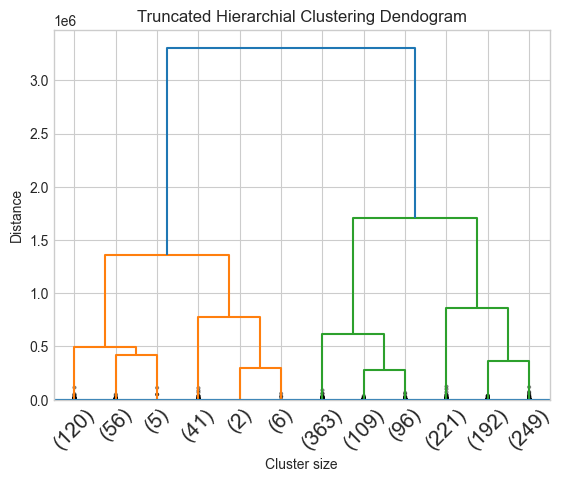

In [94]:
dendrogram(z, truncate_mode='lastp', p =12 , leaf_rotation= 45, leaf_font_size=15, show_contracted=True)
plt.title('Truncated Hierarchial Clustering Dendogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating Hierarchial Clusters

In [101]:
import sklearn.metrics as sm
k = 2
Hclustring = AgglomerativeClustering(n_clusters=k,metric ='euclidean', linkage ='ward')
Hclustring.fit(x)
sm.accuracy_score(y,Hclustring.labels_)

0.0

In [103]:
import sklearn.metrics as sm
k = 2
Hclustring = AgglomerativeClustering(n_clusters=k,metric ='euclidean', linkage ='complete')
Hclustring.fit(x)
sm.accuracy_score(y,Hclustring.labels_)

0.0

In [98]:
import sklearn.metrics as sm
k = 2
Hclustring = AgglomerativeClustering(n_clusters=k,metric ='euclidean', linkage ='average')
Hclustring.fit(x)
sm.accuracy_score(y,Hclustring.labels_)

0.0

In [76]:
import sklearn.metrics as sm
k = 2
Hclustring = AgglomerativeClustering(n_clusters=k,metric ='manhattan', linkage ='average')
Hclustring.fit(x)
sm.accuracy_score(y,Hclustring.labels_)

0.0

In [ ]:
*********Thank You*******